In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset
pd.set_option("display.max_columns", None)

data= pd.read_csv('insurance.csv')
print(data.shape)
data.head(10)

(665249, 25)


,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
5,10000000,6,0,0,11:57,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,638
6,10000000,7,0,0,11:58,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,638
7,10000000,8,0,0,12:03,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,638
8,10000000,9,1,0,12:07,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,634
9,10000005,1,0,3,08:56,NY,10006,1,0,10,e,4.0,28,28,0,3.0,13.0,1,1,3,3,1,0,2,755


In [2]:
#Remove Unwanted Columns
data = data.drop(['customer_ID', 'shopping_pt', 'record_type', 'location'], axis=1)

In [3]:
# Extract time-related features
data['day_of_week'] = pd.to_datetime(data['day']).dt.dayofweek
data['hour'] = pd.to_datetime(data['time']).dt.hour
data['minute'] = pd.to_datetime(data['time']).dt.minute

data=data.drop("time",axis=1)
data=data.drop("day",axis=1)

In [4]:
#Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Extract location-related features
state_encoded = encoder.fit_transform(data['state'].values.reshape(-1, 1))
state_data = pd.DataFrame(state_encoded, columns=encoder.categories_[0])

#Extract coverage-related features
previous_coverage_encoded = encoder.fit_transform(data['C_previous'].values.reshape(-1, 1))
previous_coverage_data = pd.DataFrame(previous_coverage_encoded, columns=encoder.categories_[0])

#Extract car-value features
car_value_encoded = encoder.fit_transform(data['car_value'].values.reshape(-1, 1))
car_value_data = pd.DataFrame(car_value_encoded, columns=encoder.categories_[0])

data = data.drop(['state','C_previous','car_value'], axis=1)  # Remove the original columns
data = pd.concat([data, state_data, previous_coverage_data.iloc[:,:-1], car_value_data.iloc[:,:-1]], axis=1)

In [5]:
print(data.shape)
data.head(10)

(665249, 68)


,group_size,homeowner,car_age,risk_factor,age_oldest,age_youngest,married_couple,duration_previous,A,B,C,D,E,F,G,cost,day_of_week,hour,minute,AL,AR,CO,CT,DC,DE,FL,GA,IA,ID,IN,KS,KY,MD,ME,MO,MS,MT,ND,NE,NH,NM,NV,NY,OH,OK,OR,PA,RI,SD,TN,UT,WA,WI,WV,WY,1.0,2.0,3.0,4.0,a,b,c,d,e,f,g,h,i
0,2,0,2,3.0,46,42,1,2.0,1,0,2,2,1,2,2,633,3,8,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,0,2,3.0,46,42,1,2.0,1,0,2,2,1,2,1,630,3,8,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0,2,3.0,46,42,1,2.0,1,0,2,2,1,2,1,630,3,8,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,0,2,3.0,46,42,1,2.0,1,0,2,2,1,2,1,630,3,8,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,0,2,3.0,46,42,1,2.0,1,0,2,2,1,2,1,630,3,11,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2,0,2,3.0,46,42,1,2.0,1,0,2,2,1,2,1,638,3,11,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,2,0,2,3.0,46,42,1,2.0,1,0,2,2,1,2,1,638,3,11,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,2,0,2,3.0,46,42,1,2.0,1,0,2,2,1,2,1,638,3,12,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,2,0,2,3.0,46,42,1,2.0,1,0,2,2,1,2,1,634,3,12,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1,0,10,4.0,28,28,0,13.0,1,1,3,3,1,0,2,755,3,8,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
#Remove Outliers
cost_UL = round(data.cost.mean() + 3 * data.cost.std(),3)
cost_LL = round(data.cost.mean() - 3 * data.cost.std(),3)
data = data[(data.cost > cost_LL) & (data.cost < cost_UL)]
print(data.shape)

(662193, 68)


In [7]:
#Handle Missing Values
data = data.fillna(data.mean())
#data=data.dropna()
print(data.shape)

(662193, 68)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662193 entries, 0 to 665248
Data columns (total 68 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   group_size         662193 non-null  int64  
 1   homeowner          662193 non-null  int64  
 2   car_age            662193 non-null  int64  
 3   risk_factor        662193 non-null  float64
 4   age_oldest         662193 non-null  int64  
 5   age_youngest       662193 non-null  int64  
 6   married_couple     662193 non-null  int64  
 7   duration_previous  662193 non-null  float64
 8   A                  662193 non-null  int64  
 9   B                  662193 non-null  int64  
 10  C                  662193 non-null  int64  
 11  D                  662193 non-null  int64  
 12  E                  662193 non-null  int64  
 13  F                  662193 non-null  int64  
 14  G                  662193 non-null  int64  
 15  cost               662193 non-null  int64  
 16  day_of_

In [9]:
#Dividing features and target
X = data.drop("cost",axis=1).values
y = data["cost"].values

In [10]:
#Divide train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Scale the features
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

# Multiple Regression

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R2 Score:", round(r2, 6))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 3), "%")

# Store results
multiple_pred = y_pred.copy()
multiple = pd.DataFrame([round(mae, 3),round(mse, 3),round(rmse, 3),round(r2, 6),round(mape, 3)], columns=['Multiple'])

Mean Absolute Error (MAE): 26.743
Mean Squared Error (MSE): 1144.929
Root Mean Squared Error (RMSE): 33.837
R2 Score: 0.420129
Mean Absolute Percentage Error (MAPE): 4.22 %


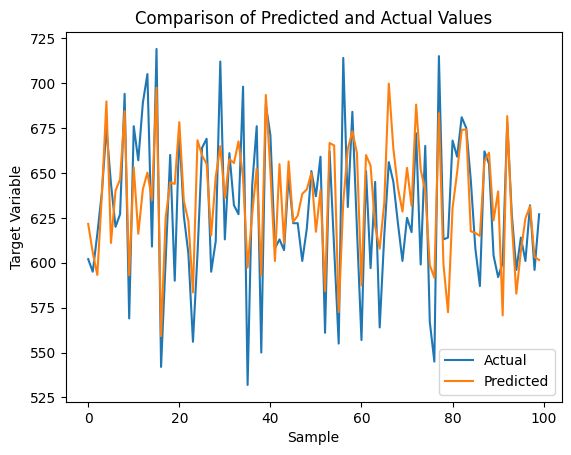

In [13]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')

plt.xlabel('Sample')
plt.ylabel('Target Variable')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()

plt.show()

# Decision Tree Regression

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the decision tree regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R2 Score:", round(r2, 6))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 3), "%")

# Store results
dtree_pred = y_pred.copy()
dtree = pd.DataFrame([round(mae, 3),round(mse, 3),round(rmse, 3),round(r2, 6),round(mape, 3)], columns=['Decision Tree'])

Mean Absolute Error (MAE): 10.015
Mean Squared Error (MSE): 401.296
Root Mean Squared Error (RMSE): 20.032
R2 Score: 0.796756
Mean Absolute Percentage Error (MAPE): 1.579 %


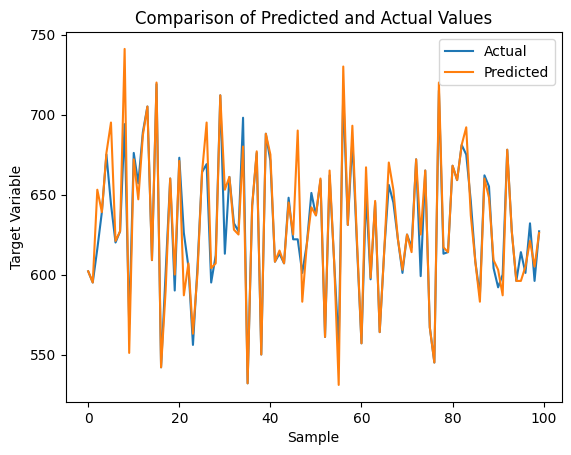

In [16]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')

plt.xlabel('Sample')
plt.ylabel('Target Variable')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()

plt.show()

# Random Forest Regression

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the Random Forest regression model
model = RandomForestRegressor(n_estimators=20,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R2 Score:", round(r2, 6))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 3), "%")

# Store results
rf_pred = y_pred.copy()
rf = pd.DataFrame([round(mae, 3),round(mse, 3),round(rmse, 3),round(r2, 6),round(mape, 3)], columns=['Random Forest'])

Mean Absolute Error (MAE): 9.216
Mean Squared Error (MSE): 228.798
Root Mean Squared Error (RMSE): 15.126
R2 Score: 0.884121
Mean Absolute Percentage Error (MAPE): 1.453 %


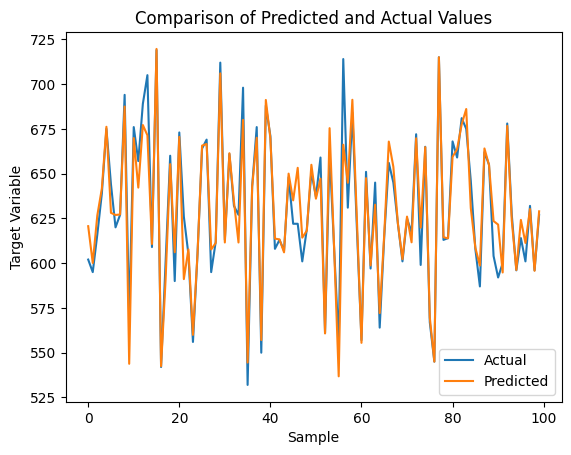

In [19]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')

plt.xlabel('Sample')
plt.ylabel('Target Variable')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()

plt.show()

# Lasso Regression

In [20]:
from sklearn.linear_model import Lasso

# Create and fit the Lasso regression model
model = Lasso(alpha=0.01,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R2 Score:", round(r2, 6))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 3), "%")

# Store results
lasso_pred = y_pred.copy()
lasso = pd.DataFrame([round(mae, 3),round(mse, 3),round(rmse, 3),round(r2, 6),round(mape, 3)], columns=['Lasso'])

Mean Absolute Error (MAE): 26.768
Mean Squared Error (MSE): 1146.646
Root Mean Squared Error (RMSE): 33.862
R2 Score: 0.41926
Mean Absolute Percentage Error (MAPE): 4.224 %


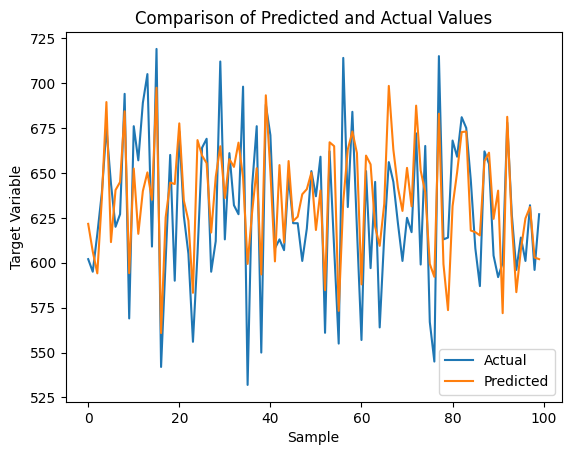

In [22]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')

plt.xlabel('Sample')
plt.ylabel('Target Variable')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()

plt.show()

# Ridge Regression

In [23]:
from sklearn.linear_model import Ridge

# Create and fit the Ridge regression model
model = Ridge(alpha=0.01,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R2 Score:", round(r2, 6))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 3), "%")

# Store results
ridge_pred = y_pred.copy()
ridge = pd.DataFrame([round(mae, 3),round(mse, 3),round(rmse, 3),round(r2, 6),round(mape, 3)], columns=['Ridge'])

Mean Absolute Error (MAE): 26.743
Mean Squared Error (MSE): 1144.929
Root Mean Squared Error (RMSE): 33.837
R2 Score: 0.420129
Mean Absolute Percentage Error (MAPE): 4.22 %


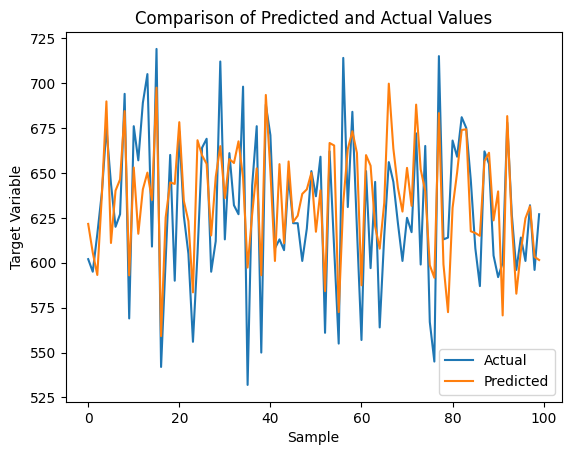

In [25]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')

plt.xlabel('Sample')
plt.ylabel('Target Variable')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()

plt.show()

# K Neighbors Regression

In [26]:
from sklearn.neighbors import KNeighborsRegressor

# Create and fit the KNN regression model
model = KNeighborsRegressor(n_neighbors=631)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R2 Score:", round(r2, 6))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 3), "%")

# Store results
kneighbors_pred = y_pred.copy()
kneighbors = pd.DataFrame([round(mae, 3),round(mse, 3),round(rmse, 3),round(r2, 6),round(mape, 3)], columns=['K Neighbors'])

Mean Absolute Error (MAE): 27.647
Mean Squared Error (MSE): 1219.543
Root Mean Squared Error (RMSE): 34.922
R2 Score: 0.382339
Mean Absolute Percentage Error (MAPE): 4.379 %


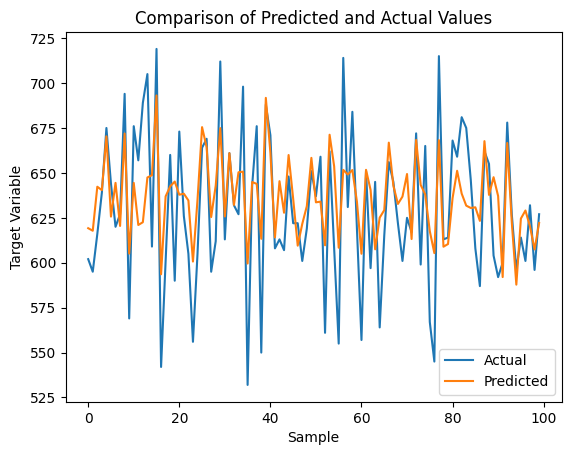

In [28]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')

plt.xlabel('Sample')
plt.ylabel('Target Variable')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()

plt.show()

# Elastic Net Regression

In [29]:
from sklearn.linear_model import ElasticNet

# Create and fit the ElasticNet regression model
model = ElasticNet(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R2 Score:", round(r2, 6))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 3), "%")

# Store results
enet_pred = y_pred.copy()
enet = pd.DataFrame([round(mae, 3),round(mse, 3),round(rmse, 3),round(r2, 6),round(mape, 3)], columns=['Elastic Net'])

Mean Absolute Error (MAE): 27.129
Mean Squared Error (MSE): 1173.281
Root Mean Squared Error (RMSE): 34.253
R2 Score: 0.40577
Mean Absolute Percentage Error (MAPE): 4.282 %


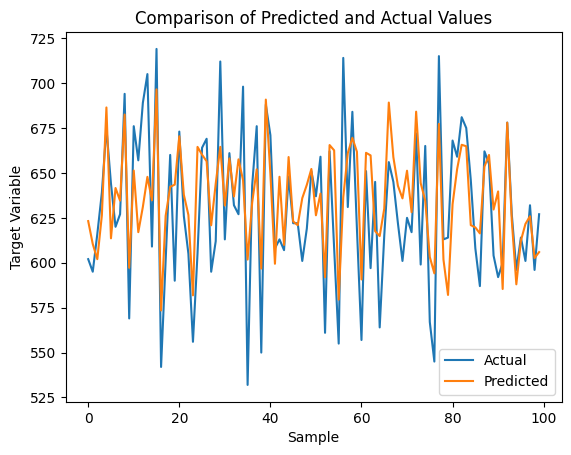

In [31]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')

plt.xlabel('Sample')
plt.ylabel('Target Variable')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()

plt.show()

# Gradient Boosting Regression

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the Gradient Boosting regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R2 Score:", round(r2, 6))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 3), "%")

# Store results
gradient_pred = y_pred.copy()
gradient = pd.DataFrame([round(mae, 3),round(mse, 3),round(rmse, 3),round(r2, 6),round(mape, 3)], columns=['Gradient Boosting'])

Mean Absolute Error (MAE): 24.443
Mean Squared Error (MSE): 956.937
Root Mean Squared Error (RMSE): 30.934
R2 Score: 0.515341
Mean Absolute Percentage Error (MAPE): 3.855 %


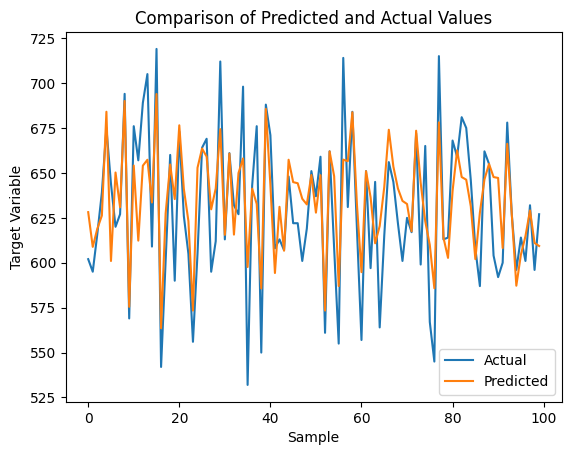

In [34]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')

plt.xlabel('Sample')
plt.ylabel('Target Variable')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()

plt.show()

# Xtreme Gradient Boosting Regression

In [35]:
import xgboost as xgb

# Convert your dataset into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the hyperparameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae'
}

model = xgb.train(params, dtrain)
y_pred = model.predict(dtest)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R2 Score:", round(r2, 6))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 3), "%")

# Store results
xg_pred = y_pred.copy()
xg = pd.DataFrame([round(mae, 3),round(mse, 3),round(rmse, 3),round(r2, 6),round(mape, 3)], columns=['XG Boost'])

Mean Absolute Error (MAE): 28.102
Mean Squared Error (MSE): 1303.55
Root Mean Squared Error (RMSE): 36.105
R2 Score: 0.339793
Mean Absolute Percentage Error (MAPE): 4.307 %


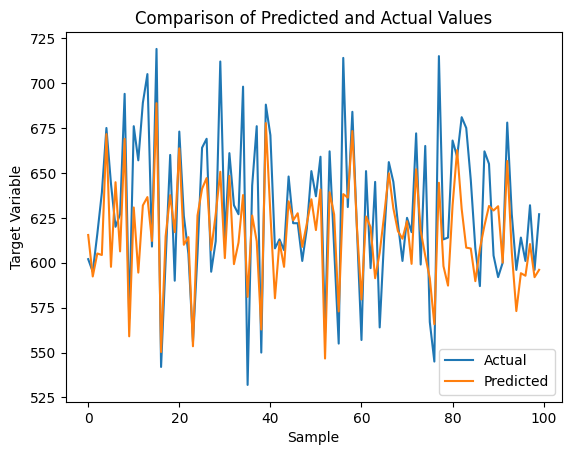

In [37]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')

plt.xlabel('Sample')
plt.ylabel('Target Variable')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()

plt.show()

# Neural Network Regression

In [39]:
from sklearn.neural_network import MLPRegressor

# Create and fit the neural network regression model
model = MLPRegressor(hidden_layer_sizes=(15, 10, 5))  # Adjust the hidden layer sizes as per your requirement
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R2 Score:", round(r2, 6))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 3), "%")

# Store results
neural_pred = y_pred.copy()
neural = pd.DataFrame([round(mae, 3),round(mse, 3),round(rmse, 3),round(r2, 6),round(mape, 3)], columns=['Neural Network'])

Mean Absolute Error (MAE): 23.499
Mean Squared Error (MSE): 894.46
Root Mean Squared Error (RMSE): 29.908
R2 Score: 0.546984
Mean Absolute Percentage Error (MAPE): 3.709 %


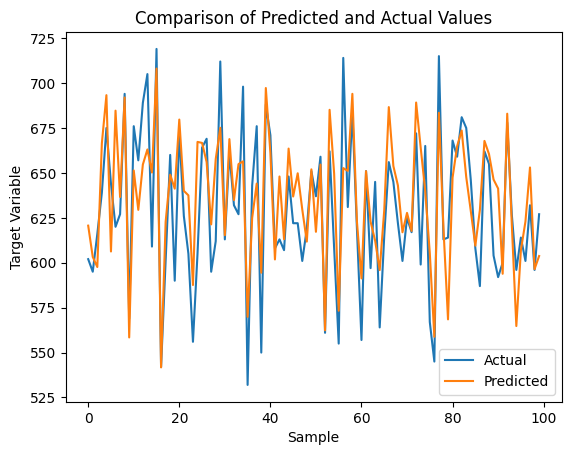

In [41]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')

plt.xlabel('Sample')
plt.ylabel('Target Variable')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()

plt.show()

# Bayesian Regression

In [42]:
from sklearn.linear_model import BayesianRidge

# Create and fit the Bayesian regression model
model = BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R2 Score:", round(r2, 6))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 3), "%")

# Store results
bayesian_pred = y_pred.copy()
bayesian = pd.DataFrame([round(mae, 3),round(mse, 3),round(rmse, 3),round(r2, 6),round(mape, 3)], columns=['Bayesian'])

Mean Absolute Error (MAE): 26.743
Mean Squared Error (MSE): 1144.928
Root Mean Squared Error (RMSE): 33.837
R2 Score: 0.42013
Mean Absolute Percentage Error (MAPE): 4.22 %


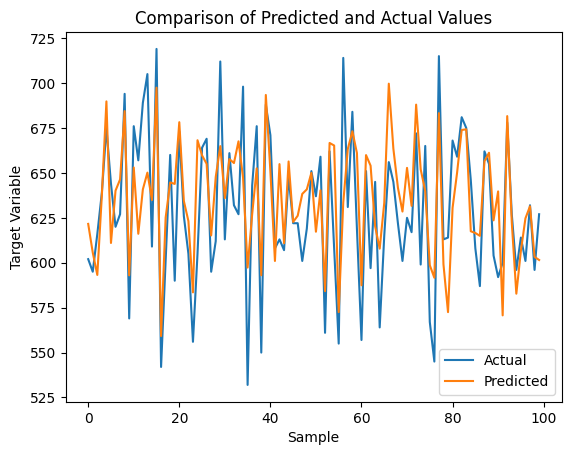

In [44]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')

plt.xlabel('Sample')
plt.ylabel('Target Variable')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()

plt.show()

In [54]:
# Compare all the models
models = pd.concat([multiple, dtree, rf, lasso, ridge, kneighbors, enet, gradient, xg, neural, bayesian], axis=1)
models = models.T
models.columns = ["MAE", "MSE", "RMSE", "R2", "MAPE"]

# Round off the values to 3 decimal places
models = models.round(3)
models["MAPE"] = models["MAPE"].astype(str) + "%"

# Display the resulting DataFrame
models

,MAE,MSE,RMSE,R2,MAPE
Multiple,26.743,1144.929,33.837,0.420,4.22%
Decision Tree,10.015,401.296,20.032,0.797,1.579%
Random Forest,9.216,228.798,15.126,0.884,1.453%
Lasso,26.768,1146.646,33.862,0.419,4.224%
Ridge,26.743,1144.929,33.837,0.420,4.22%
K Neighbors,27.647,1219.543,34.922,0.382,4.379%
Elastic Net,27.129,1173.281,34.253,0.406,4.282%
Gradient Boosting,24.443,956.937,30.934,0.515,3.855%
XG Boost,28.102,1303.550,36.105,0.340,4.307%
Neural Network,23.499,894.460,29.908,0.547,3.709%


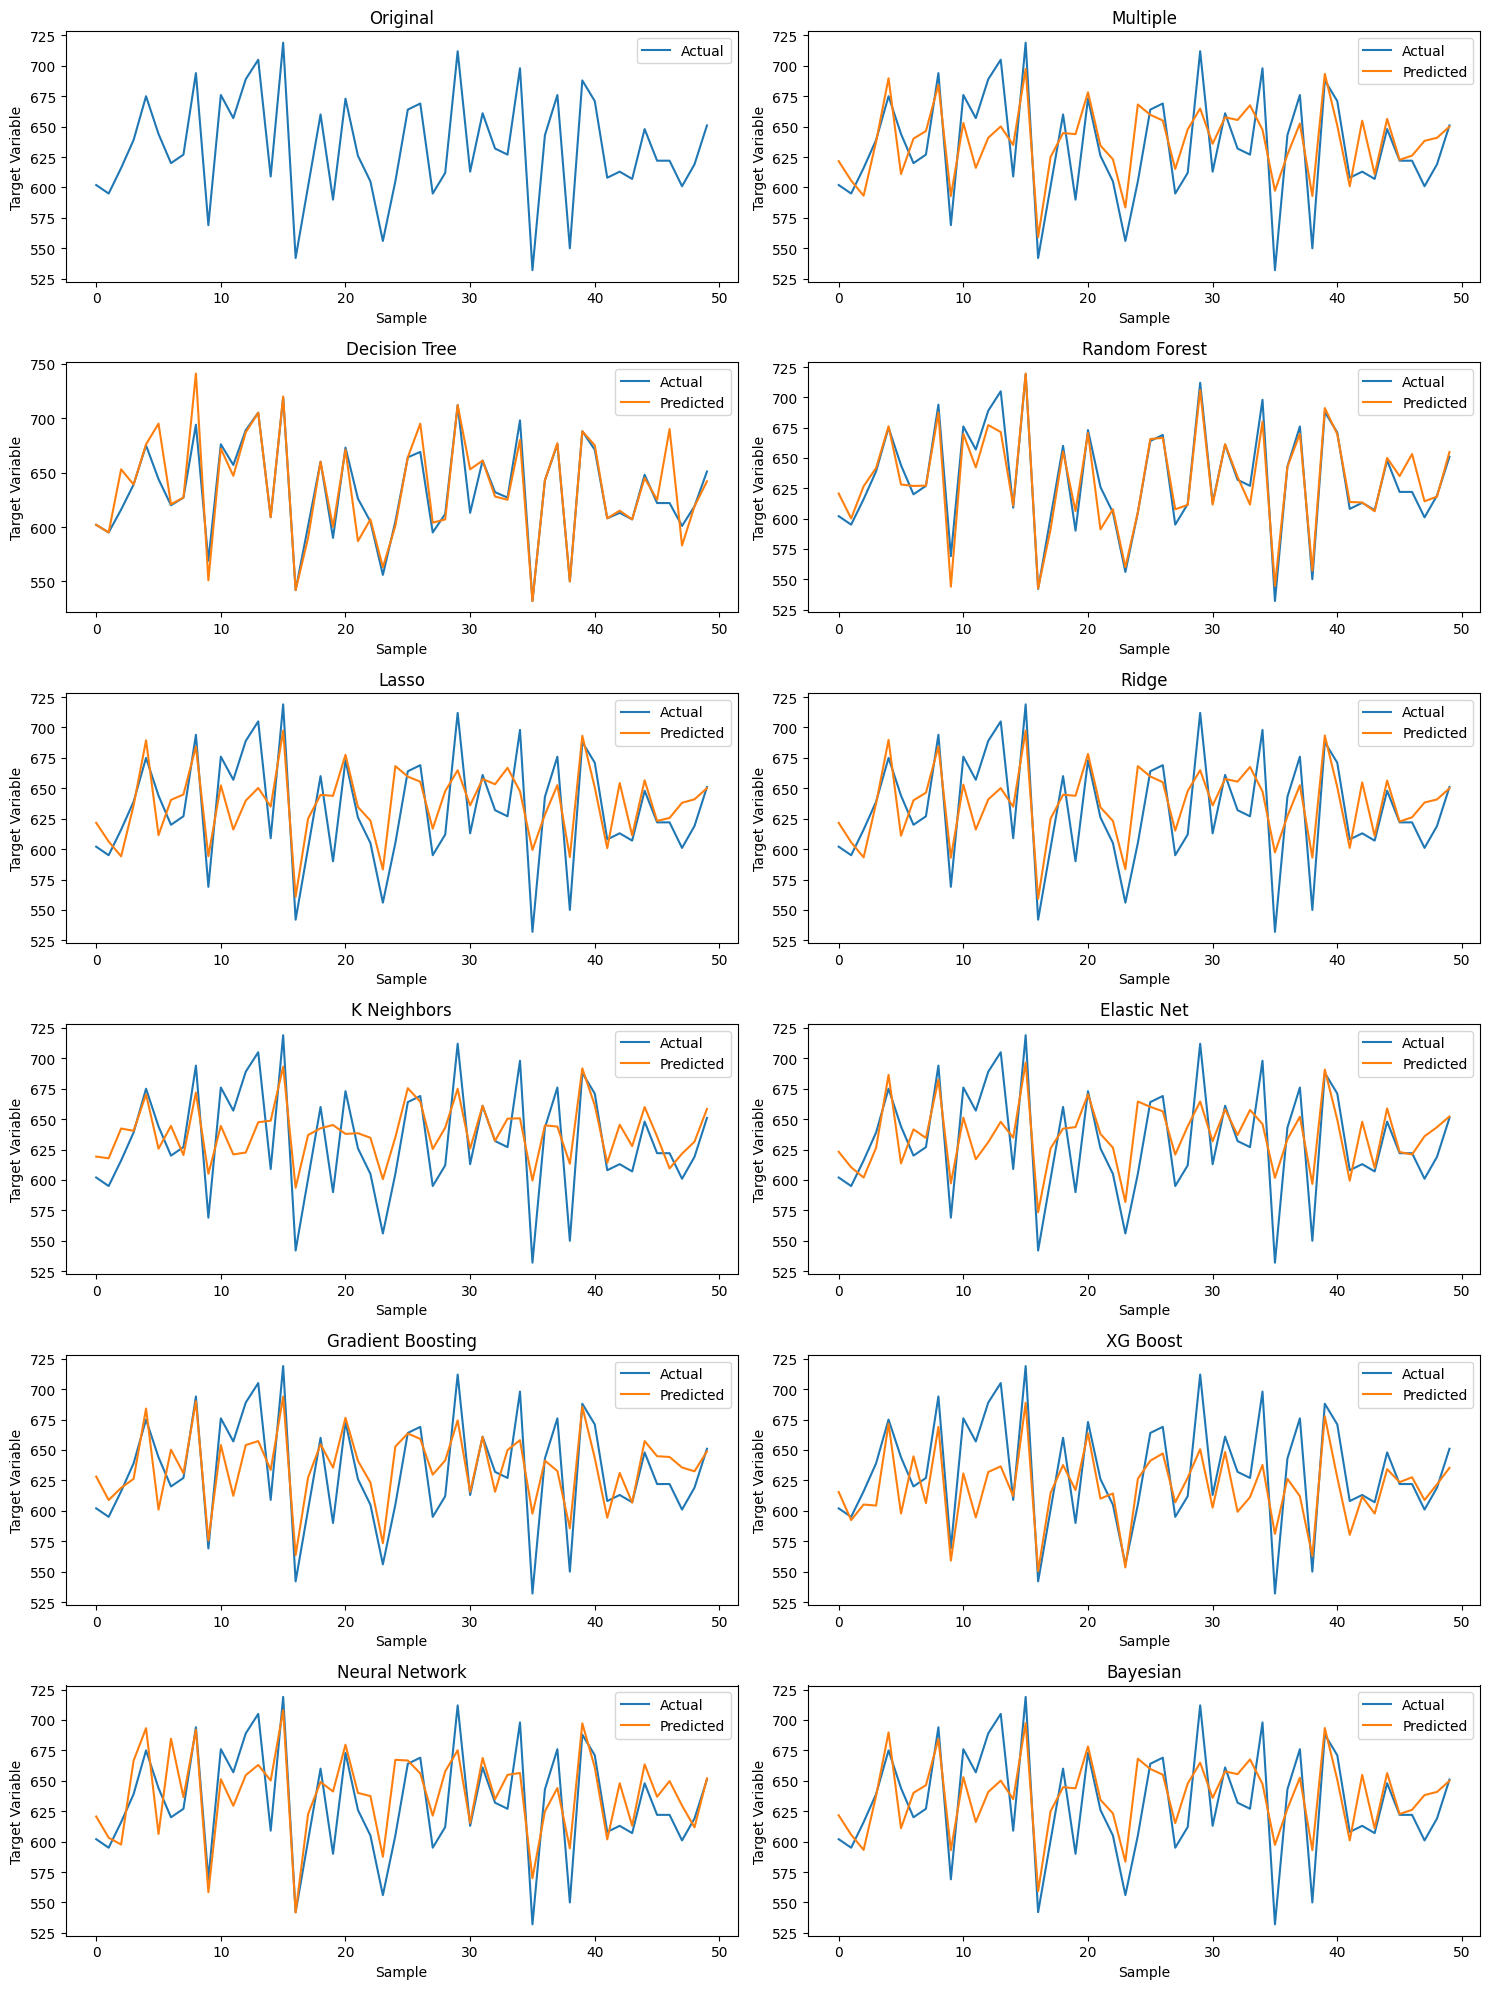

In [73]:
import matplotlib.pyplot as plt

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the models and their predictions
models = ['Multiple', 'Decision Tree', 'Random Forest', 'Lasso', 'Ridge', 'K Neighbors',
          'Elastic Net', 'Gradient Boosting', 'XG Boost', 'Neural Network', 'Bayesian']

predictions = [multiple_pred, dtree_pred, rf_pred, lasso_pred, ridge_pred, kneighbors_pred,
               enet_pred, gradient_pred, xg_pred, neural_pred, bayesian_pred]

# Iterate over the subplots and plot scatter plots
for i, ax in enumerate(axes):
    if i == 0:
        ax.plot(y_test[:50], label='Actual')
        ax.set_xlabel('Sample')
        ax.set_ylabel('Target Variable')
        ax.set_title('Original')
        ax.legend()
    elif i - 1 < len(predictions):
        ax.plot(y_test[:50], label='Actual')
        ax.plot(predictions[i - 1][:50], label='Predicted')
        ax.set_xlabel('Sample')
        ax.set_ylabel('Target Variable')
        ax.set_title(models[i - 1])
        ax.legend()
    else:
        ax.axis('off')  # If prediction list is shorter, turn off the remaining subplots

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

1. Random Forest: It has the lowest values for MAE, MSE, RMSE, and MAPE, indicating better overall performance compared to other models.

2. Decision Tree: It has relatively low values for MAE, MSE, and RMSE, and a high R2 value, suggesting good predictive power.

3. Gradient Boosting: It has a low MAE value and a relatively high R2 value, indicating good performance in terms of accuracy and predictive power.

4. Neural Network: It has a low MAE value and a high R2 value, suggesting good predictive performance.